In [1]:
import pandas as pd
import networkx as nx

# Let's start creating a subgraph using one of the three files

loading all the Answers to questions file

In [16]:
answers=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-a2q.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [17]:
answers.head()

,Active_User,Passive_User,Date
0,9,8,1217567877
1,1,1,1217573801
2,13,1,1217606247
3,17,1,1217617639
4,48,2,1217618182


In [18]:
answers["Date"]=pd.to_datetime(answers['Date'],unit='s')

In [19]:
answers.head()

,Active_User,Passive_User,Date
0,9,8,2008-08-01 05:17:57
1,1,1,2008-08-01 06:56:41
2,13,1,2008-08-01 15:57:27
3,17,1,2008-08-01 19:07:19
4,48,2,2008-08-01 19:16:22


Select only the most recent dates 

In [20]:
answers.tail()

,Active_User,Passive_User,Date
17823520,2773607,1048138,2016-03-06 12:16:21
17823521,6018278,1982354,2016-03-06 12:16:29
17823522,3187183,1404306,2016-03-06 12:17:30
17823523,6022341,1667278,2016-03-06 12:17:40
17823524,6018304,6024256,2016-03-06 12:18:13


In [21]:
Recent_answers=answers[(answers['Date'] >= '2016-03-06') & (answers["Active_User"] != answers["Passive_User"])]

In [37]:
Recent_answers.groupby(["Active_User","Passive_User"]).count()

Date  weight
Active_User Passive_User              
1           1567513          1       1
3           745537           1       1
4           73715            1       1
            437039           1       1
            2725684          1       1
...                        ...     ...
6024128     2072724          1       1
6024148     1001994          1       1
6024168     5753950          1       1
6024228     6024201          1       1
6024236     5644064          1       1

[3344933 rows x 2 columns]

In [22]:
Recent_answers.head()

,Active_User,Passive_User,Date
17820209,6022161,4329847,2016-03-06 00:00:24
17820210,1658110,2335065,2016-03-06 00:00:30
17820211,4764729,5655661,2016-03-06 00:00:34
17820212,2371601,5103110,2016-03-06 00:00:44
17820213,4467741,5993666,2016-03-06 00:00:55


In [23]:
Recent_answers.isna().sum().sum()

0

In [24]:
Recent_answers.count()

Active_User     3056
Passive_User    3056
Date            3056
dtype: int64

Creating the multi-graph using the networkx library

# time can be removed beetween the attributes? just keeping it in the key? (solo per ricordarcelo)

we decided to use a multigraph where 2 nodes can be linked by more edges, each edge is unique given its key( time)

In [ ]:
g = nx.from_pandas_edgelist(Recent_answers, "Active_User", "Passive_User", edge_attr=True,edge_key="Date",create_using=nx.MultiDiGraph())

il grafico è strano 😅 però da quello che ho capito spesso capita cosi' quando abbiamo molti nodi, ho comunque controllato guardando le edges e i nodi e sembra che si comporti bene

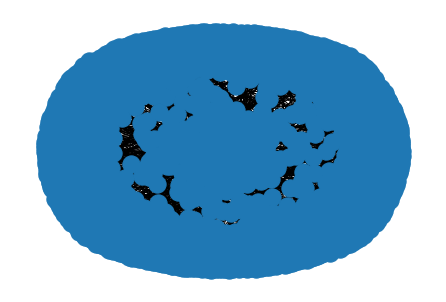

In [94]:
nx.draw(g)

Number of nodes

In [95]:
g.number_of_nodes()

4242

In [96]:
g.number_of_edges()

3056

list of all nodes

In [ ]:
list(g.nodes)

list of all edges

In [ ]:
list(g.edges)

list of tuples of node and its adjacents

In [ ]:
[(n, nbrdict) for n, nbrdict in g.adjacency()]

# Now we can start creating the needed graph

In [31]:
Recent_answers=answers[(answers['Date'] >= '2015-01-01') & (answers["Active_User"] != answers["Passive_User"])].copy()

In [32]:
Recent_answers.count()

Active_User     3462886
Passive_User    3462886
Date            3462886
dtype: int64

In [ ]:
Recent_answers.isna().sum().sum()

I insert a column with the weight for each edge

In [33]:
Recent_answers["weight"]=1

In [34]:
Recent_answers.head()

,Active_User,Passive_User,Date,weight
14055617,335858,1045881,2015-01-01 00:00:14,1
14055619,315228,3849055,2015-01-01 00:01:17,1
14055621,3047078,4059893,2015-01-01 00:01:48,1
14055622,1009603,2072444,2015-01-01 00:01:48,1
14055623,4408714,9266,2015-01-01 00:02:08,1


In [38]:
Recent_answers.groupby(["Active_User","Passive_User"]).count()

Date  weight
Active_User Passive_User              
1           1567513          1       1
3           745537           1       1
4           73715            1       1
            437039           1       1
            2725684          1       1
...                        ...     ...
6024128     2072724          1       1
6024148     1001994          1       1
6024168     5753950          1       1
6024228     6024201          1       1
6024236     5644064          1       1

[3344933 rows x 2 columns]

In [35]:
g = nx.from_pandas_edgelist(Recent_answers, "Active_User", "Passive_User", edge_attr=True,edge_key="Date",create_using=nx.MultiDiGraph())

# loading the comments on questions

In [39]:
comments_onQuestions=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2q.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [40]:
comments_onQuestions.head()

,Active_User,Passive_User,Date
0,4550,4550,1220729190
1,242,184,1220733503
2,4213,4946,1220768149
3,91,91,1220768295
4,2658,1874,1220771891


In [46]:
comments_onQuestions.count()

Active_User     20268151
Passive_User    20268151
Date            20268151
dtype: int64

In [47]:
comments_onQuestions["Date"]=pd.to_datetime(comments_onQuestions['Date'],unit='s')

In [48]:
comments_onQuestions.head()

,Active_User,Passive_User,Date
0,4550,4550,2008-09-06 19:26:30
1,242,184,2008-09-06 20:38:23
2,4213,4946,2008-09-07 06:15:49
3,91,91,2008-09-07 06:18:15
4,2658,1874,2008-09-07 07:18:11


Selecting only the most recent comments

In [53]:
Recent_comments_onQuestions=comments_onQuestions[(comments_onQuestions['Date'] >= '2015-01-01') & (comments_onQuestions["Active_User"] != comments_onQuestions["Passive_User"])].copy()

In [23]:
Recent_answers.isna().sum().sum()

0

we insert a column to add the weight to each edge

In [54]:
Recent_comments_onQuestions["weight"]=0.4

In [55]:
Recent_comments_onQuestions.head()

,Active_User,Passive_User,Date,weight
14184111,34397,4322629,2015-01-01 00:00:16,0.4
14184112,176075,3931833,2015-01-01 00:00:34,0.4
14184114,1577580,8741,2015-01-01 00:00:43,0.4
14184116,1723893,3849055,2015-01-01 00:01:02,0.4
14184117,2455888,3849055,2015-01-01 00:01:20,0.4


In [56]:
Recent_comments_onQuestions.count()

Active_User     4047082
Passive_User    4047082
Date            4047082
weight          4047082
dtype: int64

In [57]:
g2 = nx.from_pandas_edgelist(Recent_comments_onQuestions, "Active_User", "Passive_User", edge_attr=True,edge_key="Date",create_using=nx.MultiGraph())

In [ ]:
[(n, nbrdict) for n, nbrdict in g.adjacency()]

In [23]:
Recent_answers.isna().sum().sum()

0

# combining the multi-graph using the networkx library

In [59]:
G = nx.compose(g,g2)

In [ ]:
[(n, nbrdict) for n, nbrdict in g.adjacency()]

loading all the comments on answers

In [60]:
comments_onAnswers=pd.read_csv("/Users/simone/Desktop/sx-stackoverflow-c2a.txt",sep=" ",header=None,names=['Active_User', 'Passive_User', 'Date'])

In [61]:
comments_onAnswers.head()

,Active_User,Passive_User,Date
0,1,91,1220713630
1,3,91,1220713792
2,380,350,1220715736
3,4642,2257,1220734307
4,4642,1324220,1220735746


In [62]:
comments_onAnswers["Date"]=pd.to_datetime(comments_onAnswers['Date'],unit='s')

In [63]:
comments_onAnswers.head()

,Active_User,Passive_User,Date
0,1,91,2008-09-06 15:07:10
1,3,91,2008-09-06 15:09:52
2,380,350,2008-09-06 15:42:16
3,4642,2257,2008-09-06 20:51:47
4,4642,1324220,2008-09-06 21:15:46


Selecting only the most recent comments

In [66]:
Recent_comments_onAnswers=comments_onAnswers[(comments_onAnswers['Date'] >= '2015-01-01') & (comments_onAnswers["Active_User"] != comments_onAnswers["Passive_User"])].copy()

In [67]:
Recent_comments_onAnswers.head()

,Active_User,Passive_User,Date
19731116,307339,1115059,2015-01-01 00:00:42
19731118,168738,4403477,2015-01-01 00:01:06
19731119,3246173,1556111,2015-01-01 00:01:08
19731120,1027620,854246,2015-01-01 00:01:09
19731121,626921,470772,2015-01-01 00:01:14


In [69]:
Recent_comments_onAnswers["weight"]=0.6

In [70]:
Recent_comments_onAnswers.head()

,Active_User,Passive_User,Date,weight
19731116,307339,1115059,2015-01-01 00:00:42,0.6
19731118,168738,4403477,2015-01-01 00:01:06,0.6
19731119,3246173,1556111,2015-01-01 00:01:08,0.6
19731120,1027620,854246,2015-01-01 00:01:09,0.6
19731121,626921,470772,2015-01-01 00:01:14,0.6


In [71]:
Recent_comments_onAnswers.count()

Active_User     3856309
Passive_User    3856309
Date            3856309
weight          3856309
dtype: int64

In [ ]:
g3 = nx.from_pandas_edgelist(Recent_comments_onAnswers, "Active_User", "Passive_User", edge_attr=True,edge_key="Date",create_using=nx.MultiGraph())

combining the multi-graph using the networkx library

In [ ]:
final_G = nx.compose(g3,G)

In [ ]:
nx.write_gml(final_G, "final_")